# Programming Patterns in Python

Now that we have an understanding of how computers organize data and have some low level programming operations, let's look at a few common high-level programming patterns. Each of these operations has an implementation using conditional and loop patterns, which we can very easily express using python syntax. We can also use existing library functions to achieve the same thing, which we'll explore also.

As we go through, you will see that program design and coding are a game of word association. A high-level operation, such as map, should trigger a pseudocode (English-like "code") loop template in your mind, which should then trigger a for-each Python code template.

*Keep in mind that we design programs by selecting and applying operations, not specific code sequences. Coding is the final act in the design process where we get an executable document.* So, think visually about how you would manipulate lists of data or extract information from data. I often draw things out or put them into a spreadsheet to help me visualize. Manually moving some data around on paper helps me to understand the operations to perform. 

After designing a sequence or combination of high-level operations, we can write things out in pseudocode or go straight to Python syntax. As you gain more experience, it will be easier to go straight from the operation to the code, but we still design programs using operations, not code, in our head. For complex problems, I still write out pseudocode, despite 35+ years coding experience.

## Programming patterns

Programmers draw from a set of patterns or templates when choosing an overall program plan. The same is true of the individual operations themselves.  Programmers have a catalog of common operations that they rely on when choosing the steps of a plan.

You're no doubt familiar with operations such as:

* *sum the numbers in a list*
* *count the numbers in a list*.

But we can abstract those further into:

* *find all values in a list satisfying a condition*
* *apply an operation to each element in the list*. 
* ...

The more abstract the operation, the more widely applicable it is.  The kinds of operations we use depends partly on a programmer's style but is heavily influenced by the capabilities of the programming language and its libraries of pre-existing functionality.

## Data for exercises

We will be doing several small exercises as we go through this material. Please cut and paste this Python code into the notebook you are using.

Please try to do the exercises without looking at the solutions, which appear immediately below the exercise description.

In [1]:
UnitPrice = [38.94, 208.16, 8.69, 195.99]
Shipping = [35, 68.02, 2.99, 3.99, 5.94, 4.95, 7.72, 6.22]
names=['Xue', 'Mary', 'Bob']
Oscars = [
    [1984, "A Soldier's Story", 0],
    [1984, 'Places in the Heart', 0],
    [1984, 'The Killing Fields', 0],
    [1984, 'A Passage to India', 0],
    [1984, 'Amadeus', 1],
    [1985, "Prizzi's Honor", 0],
    [1985, 'Kiss of the Spider Woman', 0],
    [1985, 'Witness', 0],
    [1985, 'The Color Purple', 0],
    [1985, 'Out of Africa', 1]
]
Quantity = [6, 49, 27, 30, 19, 21, 12, 22, 21]
A = [
    [1, 3, 10],
    [4, -9, 0],
    [2, 5, 8]
]
B = [
    [7, 4, 0],
    [4, 3, 1],
    [1, 6, 8]
]
first=['Xue', 'Mary', 'Robert']
last=['Li', 'Smith', 'Dixon']

## Accumulate

Let's start with a very simple but extremely common pattern called  accumulate. The pattern traverses a sequence of elements and accumulates a value. For example, to sum the numbers in a sequence, we use the accumulator operation with the `+` operator. As we traverse the sequence, we update a running sum that's initialized to 0:

<img src="images/accumulator.png" width="290">

In Excel, this is like using `sum(...)` in a cell. In Python, the implementation of this pattern has an initialization step and a loop:

In [2]:
sum = 0
for q in Quantity:
    sum += q # same as: sum = sum + q
print(sum)

207


We can use any other arithmetic operator we want, such as `*`. In fact, we can use any function that takes two operands and returns a new value. For summing, the two "input" numbers of the function are the previous accumulated value and the next value in the sequence. The result of that function is the new accumulated value. `+` and `*` are the most common operators. 

You will also see this operation called *reduce*, as in *map*/*reduce* in the distributed computing world of Hadoop and Spark.

A **counter** is a special case of an accumulator that counts the number of elements in a sequence. It also uses the `+` operator but the two "input" numbers are the previous accumulated value and a fixed 1 value, not the next element in the sequence.

We can update multiple running accumulated values, not just one. For example, let's say we wanted to count the number of even and odd values in a sequence. We need two accumulator values, both starting at zero, but the operation is the same:

<img src="images/accumulator-even-odd.png" width="320">

The `+1` indicates an "add one to accumulated value" operation applied at each step but only if the current value is even or odd. In Python code, we'd do something like the following:

In [3]:
even = 0
odd = 0
for q in Quantity:
    if q % 2 == 0: even += 1 # % is mod operator
    else: odd += 1
print(even, odd)

4 5


## Map

Perhaps the most common operation *maps* one sequence to another, applying an operator or function to each element. (It's like an accumulator that accumulates a list of stuff instead of a single value.) For example, using a spreadsheet to create a new column containing the unit price discounted by 5% starts like this in a spreadsheet:

<img src="images/map-discount-op.png" width="390">

We can represent both lists at time 0 using list literals:

In [4]:
UnitPrice = [38.94, 208.16, 8.69, 195.99]
Discounted = [] # empty list

In other words:

<img src="images/price-time0.png" width="400">

The translation process in our heads from high-level operation to pseudocode to code is a game of *word association*". When your brain sees an operation that maps a column of data to another, think "map". When your brain hears "map" it should generate the appropriate pseudocode loop, filling in the pieces appropriately.  When your brain hears "for each blah blah", think "oh, for-each loop" and use the appropriate coding pattern:

In [5]:
Discounted = [] # empty list
for price in UnitPrice:
    Discounted.append(price * 0.95)
print(Discounted)

[36.992999999999995, 197.75199999999998, 8.2555, 186.1905]


Notice that I have included the initialization of the empty list as part of this code snippet. The reason is that we really want to mentally associate the initialization with this code pattern.

Even at the microlevel, think about mapping operations to code. For example, when I think about "*add <ins>x</ins> to list <ins>y</ins>*", my brain translates that to `y.append(x)`.

### List comprehension for map operation

This is such a common pattern that Python has an explicit construct to make things easier.  It's called a *list comprehension* and it's really just shorthand that looks more like mathematical set notation:

In [6]:
Discounted = [price * 0.95 for price in UnitPrice] # a list comprehension
print(Discounted)

[36.992999999999995, 197.75199999999998, 8.2555, 186.1905]


### Exercise

Without looking at the code we just did, try to write the code out for a map operation using a list comprehension that divides the prices in half, again putting the values in `Discounted`. **Don't cut/paste. Type!**

In [7]:
Discounted = [price/2 for price in UnitPrice] # a list comprehension
print(Discounted)

[19.47, 104.08, 4.345, 97.995]


### Exercise

Given a list of names, `['Xue', 'Mary', 'Robert']`, give code to implement a map operation that converts the names to list `namelens` containing the length of the names. Hint: Function call `len('Xue')` returns 3. **Don't cut/paste. Type!**

In [8]:
names = ['Xue', 'Mary', 'Robert']
namelens = [len(name) for name in names]
print(namelens)

[3, 4, 6]


## Combine

Let's look at the code pattern to traverse two lists at once placing the result in a third list. For example, to compute the cost of a sales transaction, we multiply the quantity times the unit price. In a spreadsheet, that looks like this:

<img src="images/map-formula.png" width="250">

Dragging that formula down the Cost column, applies the formula to the following rows, thus, filling the new column.

Programmatically, what we're doing is multiplying the *ith* element from two different sequences and placing the result in the *ith* position of the output sequence:

<img src="images/map-mult.png" width="490">

At time zero, we have the following data available:

In [9]:
Quantity = [6, 49, 27, 30, 19, 21, 12, 22, 21]
UnitPrice = [38.94, 208.16, 8.69, 195.99, 21.78, 6.64, 7.3, 42.76, 138.14]

When traversing more than a single list, we typically need to use an indexed loop rather than a for-each loop:

In [10]:
Cost = []
for i in range(len(Quantity)): # from 0 to length of Quantity-1, inclusively
    Cost.append( Quantity[i] * UnitPrice[i] )
print(Cost)

[233.64, 10199.84, 234.63, 5879.700000000001, 413.82000000000005, 139.44, 87.6, 940.7199999999999, 2900.9399999999996]


### List comprehension for combine operation

Or, better yet, use a list comprehension:

In [11]:
Cost = [Quantity[i] * UnitPrice[i] for i in range(len(Quantity))]
print(Cost)

[233.64, 10199.84, 234.63, 5879.700000000001, 413.82000000000005, 139.44, 87.6, 940.7199999999999, 2900.9399999999996]


Note that you might be tempted to use a double `for`-each loop in a list comprehension, but you get the cross product of each value in quantity times each value in your price. That's not what we want, as you can see here:

In [12]:
print( [q*p for q in Quantity for p in UnitPrice] ) # WRONG!

[233.64, 1248.96, 52.14, 1175.94, 130.68, 39.839999999999996, 43.8, 256.56, 828.8399999999999, 1908.06, 10199.84, 425.81, 9603.51, 1067.22, 325.35999999999996, 357.7, 2095.24, 6768.86, 1051.3799999999999, 5620.32, 234.63, 5291.7300000000005, 588.0600000000001, 179.28, 197.1, 1154.52, 3729.7799999999997, 1168.1999999999998, 6244.8, 260.7, 5879.700000000001, 653.4000000000001, 199.2, 219.0, 1282.8, 4144.2, 739.8599999999999, 3955.04, 165.10999999999999, 3723.8100000000004, 413.82000000000005, 126.16, 138.7, 812.4399999999999, 2624.66, 817.74, 4371.36, 182.48999999999998, 4115.79, 457.38, 139.44, 153.29999999999998, 897.9599999999999, 2900.9399999999996, 467.28, 2497.92, 104.28, 2351.88, 261.36, 79.67999999999999, 87.6, 513.12, 1657.6799999999998, 856.68, 4579.5199999999995, 191.17999999999998, 4311.780000000001, 479.16, 146.07999999999998, 160.6, 940.7199999999999, 3039.08, 817.74, 4371.36, 182.48999999999998, 4115.79, 457.38, 139.44, 153.29999999999998, 897.9599999999999, 2900.939999999

### The zip function

We can also use `zip`, a very useful function that pulls one value from each list to make a tuple at each iteration:

In [13]:
Cost = []
for q,u in zip(Quantity,UnitPrice):
    Cost.append( q * u )
print(Cost)

[233.64, 10199.84, 234.63, 5879.700000000001, 413.82000000000005, 139.44, 87.6, 940.7199999999999, 2900.9399999999996]


Or, with a list comprehension:

In [14]:
Cost = [q * u for q,u in zip(Quantity,UnitPrice)]
print(Cost)

[233.64, 10199.84, 234.63, 5879.700000000001, 413.82000000000005, 139.44, 87.6, 940.7199999999999, 2900.9399999999996]


## Split

The opposite of combining is splitting where we split a stream into two or more new streams. For example, I often have to split the full names in a list into their first and last names. In a spreadsheet, we make a blank column:

<img src="images/split-names.png" width="250">

and then split on the space character (In Excel, you use `Data` > `Text to Columns`) to get two new columns:

<img src="images/split-names-after.png" width="160">

We could "undo" this split using a *combine* operation with the string concatenation operator, which would combine first and last names together into a new stream containing full names again.

Another common use of splitting is to take a string representing a string of numbers and split it into a list with those numbers:

In [15]:
'1 2 3'.split(' ')

['1', '2', '3']

In [16]:
values = '1 2 3'.split(' ')
[int(v) for v in values]

[1, 2, 3]

We can even traverse a list to get a matrix (list of lists)

In [17]:
rows = [
    '1 2 3',
    '3 4 5'
]
matrix = [[int(v) for v in row.split(' ')] for row in rows]
matrix

[[1, 2, 3], [3, 4, 5]]

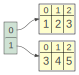

In [18]:
from lolviz import *
objviz(matrix)

## Slice

Most of the operations we've examined so far yield lists or sequences that have the same size as the input sequence, but there are many operations that yield subsets of the data. The first such operation is slice, which extracts a subset of a list. (Again, here I explicitly use the term list to indicate that slicing generally occurs on a data structure that fits in memory.)

The slice operation is a function of two values, a start and end position within a list.

In [19]:
names=['Xue', 'Mary', 'Bob']
print(f"Length {len(names)}")
print(names[0:1])
print(names[0:2])
print(names[0:3])
print(names[2:3])

Length 3
['Xue']
['Xue', 'Mary']
['Xue', 'Mary', 'Bob']
['Bob']


**Warning**: Most languages and libraries assume the ending slice position is exclusive, which would mean slicing from the position 0 to position 3, in this case. To make matters more complicated, Python but not R, starts counting at 0 not 1. It's hard to switch back and forth between Python and R in this respect, so it's good to highlight here so you keep it in mind.

## Filter

The most general operation used to extract data from a list or  sequence is called *filter*. For example, using Excel's filter mechanism, we can filter a Shipping column for those values less than $10:

<img src="images/filter-shipping.png" width="170">

The filter operation is similar to the map operation in that a computation is applied to each element of the input stream. Map applies a function to each element of a sequence and creates a new sequence of the same size. Filter tests each element for a specific condition and, if true, adds that element to the new sequence.

<img src="images/filter-apply.png" width="590">

A filter operation is just a map that conditionally adds elements to the target list:

In [20]:
Shipping = [35, 68.02, 2.99, 3.99, 5.94, 4.95, 7.72, 6.22]
Shipping2 = []
for x in Shipping:
    if x < 10:
        Shipping2.append(x)
print(Shipping2)

[2.99, 3.99, 5.94, 4.95, 7.72, 6.22]


### List comprehension for filter operation

But, we should use instead a variation on the list comprehension seen in the pattern we have for the map operation:

In [21]:
Shipping2 = [x for x in Shipping if x < 10]
print(Shipping2)

[2.99, 3.99, 5.94, 4.95, 7.72, 6.22]


We can also filter on one column but keep the data within each row together. Here is an example, using Excel, that filters Oscar winners from the list of nominees (the condition is *winner equals 1*):

<img src="images/filter-winners.png" width="590">

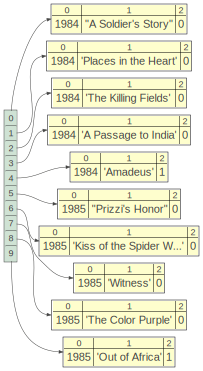

In [22]:
Oscars = [
    [1984, "A Soldier's Story", 0],
    [1984, 'Places in the Heart', 0],
    [1984, 'The Killing Fields', 0],
    [1984, 'A Passage to India', 0],
    [1984, 'Amadeus', 1],
    [1985, "Prizzi's Honor", 0],
    [1985, 'Kiss of the Spider Woman', 0],
    [1985, 'Witness', 0],
    [1985, 'The Color Purple', 0],
    [1985, 'Out of Africa', 1]
]
objviz(Oscars)

The code for the looping construct looks like (jumping straight to the list comprehension form):


[[1984, 'Amadeus', 1], [1985, 'Out of Africa', 1]]


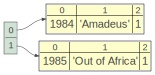

In [23]:
Oscars2 = [movie for movie in Oscars if movie[2]==1]
print(Oscars2)
objviz(Oscars2)

The output is a list of lists, a filtered table of rows one per movie.

Notice how we test one column value from the row, `movie[2]`, but add the entire row to the new table. If we just added the "winner" column value to the new list, we would end up with a list of ones: 1, 1, 1, ..., 1.

### Exercise

Filter the `Oscars` list into `Oscars2` for all movies with 3-word titles. To break a string into a list of words, use `title.split(' ')`. If the length, `len()`, of that list is 3, then copy the entire row to `Oscars2`.

In [24]:
Oscars2 = [movie for movie in Oscars if len(movie[1].split(' '))==3]
print(Oscars2)

[[1984, "A Soldier's Story", 0], [1984, 'The Killing Fields', 0], [1985, 'The Color Purple', 0], [1985, 'Out of Africa', 1]]


### Exercise

Rather than just referencing an iterate value, `x`, we can also use expressions in list comprehensions. Use the filtering variation of a list comprehension to double the shipping cost in `Shipping` if less than 10 dollars. Put the result in list `Shipping2`.

In [25]:
Shipping2 = [x*2 for x in Shipping if x < 10]
print(Shipping2)

[5.98, 7.98, 11.88, 9.9, 15.44, 12.44]


### Exercise

Given a list of `names=['Xue', 'Mary', 'Bob']`, filter the list into `names2` for those names starting with `X`. Recall that `name[i]` yields the ith character in `name`.

In [26]:
names=['Xue', 'Mary', 'Bob']
names2 = [name for name in names if name[0]=='X']
print(names2)

['Xue']


## Search

The filter operation finds all elements in a sequence that satisfy a specific condition, but often we'd like to know which element satisfies the condition first (or last). (Or, we often just need to know if a particular element is present.) This brings us to the *search* operation. At its most general, search returns the first (or last) position in the sequence rather than the value at that position. If we have the position, often called the *index*, we can always ask the sequence for the value at that position. If the element is not found, the search returns invalid index -1. 

Searching is, in some sense, a variation on filtering. The difference is what we do when we find an element for which the condition is true. Instead of adding that element to the target list, a search bails out of the loop.

In [27]:
first=['Xue', 'Mary', 'Robert']     # our given input
target = 'Mary'                     # searching for Mary
index = -1
for i in range(len(first)):         # i is in range [0..n-1] or [0..n)
    if first[i]==target:
        index = i
        break
print(index)

1


The `break` statement breaks out of the immediately-enclosing loop, regardless of the type of loop.

The search operation can even be used within a string (list of characters) to find the position of a character of interest. For example, to slice up a full name into first and last names, we can combine a search for the space character with two slice operations. Given full name `Xue Li`, a search for the space character returns the fourth position or index 3. To extract the first name, we slice from index 0 to index 3, exclusively on the right. To get the last name, we slice from index 4 to 6, exclusively on the right. 

<img src="images/split-string.png" width="190">

Here's what that looks like a python:

In [28]:
name = 'Xue Li'

# SEARCH
index = -1
for i in range(len(name)):
    if name[i]==' ':
        index = i
        break
print(f"Index of space is {index}")

# SLICE
print(f"First: {name[0:index]}")
print(f"Last: {name[index+1:]}") # or name[index+1:len(name)]

Index of space is 3
First: Xue
Last: Li


To determine the index of the end of the string, programmers tend to use the length of the string. The length works out to be an index whose value is one past the end of the string, which is what we want for a slice using an exclusive right index.

## Nested loops

We sometimes need to repeat repeated instructions, which we call a *nested loop*. In the analytics world, nested loops are hugely important because we use them to process matrices, images, and tables of data.

### Processing matrices

Recall that, while we humans can look at the entire matrix at once, a computer examines each element one-by-one. Take a look at this 3x3 matrix:

<img src="images/matrixA.png" width="100">

which we can represent in python using a list of list:

In [29]:
A = [
    [1, 3, 10],
    [4, -9, 0],
    [2, 5, 8]
]

Because this is not a one-dimensional data structure, we can't use a simple "for each element in the matrix" loop to examine each element. The most common pattern for iterating through all elements of an *nrows* x *ncols* matrix looks like this:

*for i in 0..nrows-1:*<br>
&nbsp;&nbsp;&nbsp;&nbsp;*for j in 0..ncols-1:*<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;*do something with matrix[i,j]*

where *matrix[i,j]* accesses the element at row *i* and column *j*.  Such a nested loop gives all possible combinations of *i* and *j*, which is what we want when operating on a matrix. Consider the following translation of that template to Python that prints out all of the two-dimensional indices:

In [30]:
nrows = 3  # or len(A)
ncols = 3  # or len(A[0]) length of first row
for i in range(nrows):
    for j in range(ncols):
        print( i, j )

0 0
0 1
0 2
1 0
1 1
1 2
2 0
2 1
2 2


Notice how the column *j* value varies more quickly than the row *i* value.  We can reverse this order of traversal by changing the loop order:

In [31]:
for j in range(ncols):
    for i in range(nrows):
        print(i, j)

0 0
1 0
2 0
0 1
1 1
2 1
0 2
1 2
2 2


With the *j* loop on the outside, it will vary less quickly than the inner *i* loop.

### Double-for list comprehensions to get all combinations

Double loops inside list comprehensions give all combinations, which in this case is something we want. The following code example creates a list of string representations of the coordinates:

In [32]:
coords = [f"{i},{j}" for i in range(nrows) for j in range(ncols)]
print(coords)

['0,0', '0,1', '0,2', '1,0', '1,1', '1,2', '2,0', '2,1', '2,2']


Now, let's use an accumulator to sum all of the elements of a 3x3 matrix, we let *nrows*=3 and *ncols*=3 and use an addition operation:

In [33]:
sum = 0
for i in range(nrows):
    for j in range(ncols):
        sum = sum + A[i][j]
print(sum)

24


### Processing images

In the images project for this class, we do lots of fun things to images. An image is nothing more than a two-dimensional matrix whose entries are pixel grayscale values from 0 to 255. A pixel value of 0 is black and 255 is white. For example, if we zoom in on an image, we see the individual elements (called pixels) of a two-dimensional matrix:

<img src="images/obama-zoom.png" width="400">

The only difference between an image and a matrix is that we typically access the elements of an image using x and y coordinates, rather than row and column. The template for a nested loop that accesses each element of an image looks like this:

*for x in 0..width-1:*<br>
&nbsp;&nbsp;&nbsp;&nbsp;*for y in 0..height-1:*<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;*process pixel[x,y]*<br>

Because the *y* coordinate varies faster than the *x* coordinate, the inner loop traverses one vertical stripe. The outer loop shifts *x* to the next vertical stripe to the right.

### Exercise

As a more realistic example, let's add two matrices A and B together to form C. The key operation is to add A<sub>i,j</sub> to B<sub>i,j</sub> to get C<sub>i,j</sub>. Visually, it looks like this:

<img src="images/ABC.png" width="360">


Write out the nested Python indexed loops to add two matrices together, C = A + B. Here are some definitions to get you started:

```python
A = [
    [1, 3, 10],
    [4, -9, 0],
    [2, 5, 8]
]
B = [
    [7, 4, 0],
    [4, 3, 1],
    [1, 6, 8]
]
# Use list comprehension to init list of lists
C = [[0]*ncols for i in range(nrows)]
```

In [34]:
A = [
    [1, 3, 10],
    [4, -9, 0],
    [2, 5, 8]
]
B = [
    [7, 4, 0],
    [4, 3, 1],
    [1, 6, 8]
]
# Use list comprehension to init list of lists
C = [[0]*ncols for i in range(nrows)]
for i in range(nrows):
    for j in range(ncols):
        C[i][j] = A[i][j] + B[i][j]
print(C)

[[8, 7, 10], [8, -6, 1], [3, 11, 16]]


### Exercise

Instead of using indexed loops as we've done so far (which is very appropriate for matrices), we can also use nested for-each loops. Try this out.

Given a list of first names, `first=['Xue', 'Mary', 'Robert']` and a list of last names, `last=['Li', 'Smith', 'Dixon']`, write a nested Python loop to print every combination of first and last name.

In [35]:
first=['Xue', 'Mary', 'Robert']
last=['Li', 'Smith', 'Dixon']
for f in first:
    for l in last:
        print(f+' '+l)

Xue Li
Xue Smith
Xue Dixon
Mary Li
Mary Smith
Mary Dixon
Robert Li
Robert Smith
Robert Dixon


### Exercise

Now repeat that exercise using a double-loop list comprehension.

In [36]:
print([f+' '+l for f in first for l in last])

['Xue Li', 'Xue Smith', 'Xue Dixon', 'Mary Li', 'Mary Smith', 'Mary Dixon', 'Robert Li', 'Robert Smith', 'Robert Dixon']


### Exercise

Write Python code to sum column index 2 from the Oscars table. You can find the Python for the table definition above.

In [37]:
Oscars = [
    [1984, "A Soldier's Story", 0],
    [1984, 'Places in the Heart', 0],
    [1984, 'The Killing Fields', 0],
    [1984, 'A Passage to India', 0],
    [1984, 'Amadeus', 1],
    [1985, "Prizzi's Honor", 0],
    [1985, 'Kiss of the Spider Woman', 0],
    [1985, 'Witness', 0],
    [1985, 'The Color Purple', 0],
    [1985, 'Out of Africa', 1]
]

sum = 0
for movie in Oscars:
    sum = sum + movie[2]
print(sum)

2
